In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('assignment2.csv')

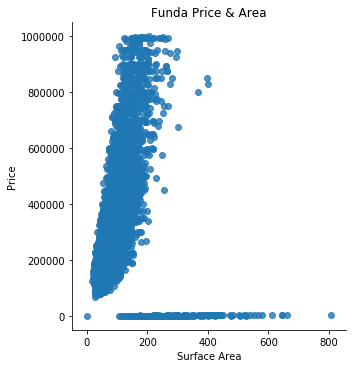

In [3]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Surface Area')
plt.ylabel('Price')
plt.title('Funda Price & Area')
plt.show()

In [4]:
def under_5000(x):
    if(x < 5000):
        return float('NaN')
    else:
        return x

df['price'] = df['price'].apply(under_5000)
df = df.dropna()


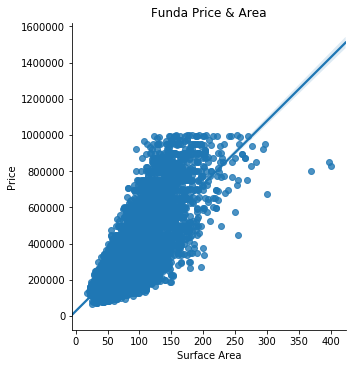

In [7]:
sns.lmplot(x='area', y='price', data=df)
plt.title('Funda Price & Area')
plt.xlabel("Surface Area")
plt.ylabel("Price")
plt.show()

In [8]:
x = df[['area']] #get the subscrivers
y = df['price'] #get the views
lm = LinearRegression() #create a new (empty model)
lm.fit(x, y) #fit the model

df['price_p'] = lm.predict(x) #generate the predictions and add them to the dataframe
df['resid'] = df['price'] - df['price_p'] #get the residuals by subtracting the prediction from the actual views

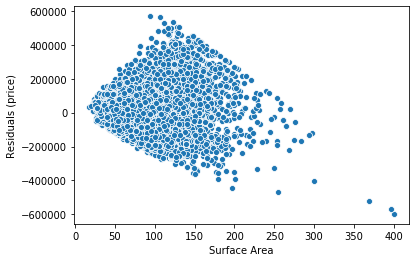

In [9]:
sns.scatterplot(x='area',y='resid',data=df)
plt.xlabel('Surface Area')
plt.ylabel('Residuals (price)')
plt.show()

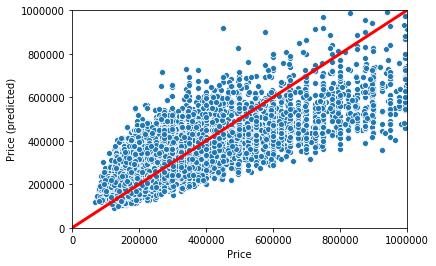

In [11]:
sns.scatterplot(x='price',y='price_p',data=df)
plt.xlim(0, 1000000) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 1000000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 1000000], [0, 1000000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Price')
plt.ylabel('Price (predicted)')
plt.show()

In [12]:
r2_score(df['price'], df['price_p']) #this gives the model fit (R2) for the Y and predicted Y

0.5257421182315432

In [13]:
math.sqrt(mean_squared_error(df['price'], df['price_p'])) #this gives the model fit (R2) for the Y and predicted Y

118016.87861535022

The RMSE is 118000. Which means that we are typically about 118000 off in our predicted views.

For example, the predicted price is 900.000. It can be 118.000 on average under or above the predicted price of 900.000.  